# **CASE: VENDA DE VEÍCULOS**

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

### Leitura da base de dados

In [3]:
dados_faturamento = pd.read_csv( "../Dados/Faturamento.txt",sep= "\t")

### Visualização da base de dados

In [4]:
dados_faturamento

,COD_PRODUTO,INVESTIMENTO,FATURAMENTO
0,C_0001,20500,526400
1,C_0002,17500,312200
2,C_0003,18500,429200
3,C_0004,14500,470900
4,C_0005,12000,407100
5,C_0006,18800,339800
6,C_0007,18700,335900
7,C_0008,15000,361300
8,C_0009,16700,341700
9,C_0010,23500,484300


### Análise exploratória breve

In [5]:
# Medidas resumo
dados_faturamento.describe()

,INVESTIMENTO,FATURAMENTO
count,50.000000,50.000000
mean,17784.000000,370074.000000
std,3413.021882,76846.504335
min,10000.000000,198000.000000
25%,15550.000000,326375.000000
50%,17750.000000,361200.000000
75%,20425.000000,433025.000000
max,24500.000000,526400.000000


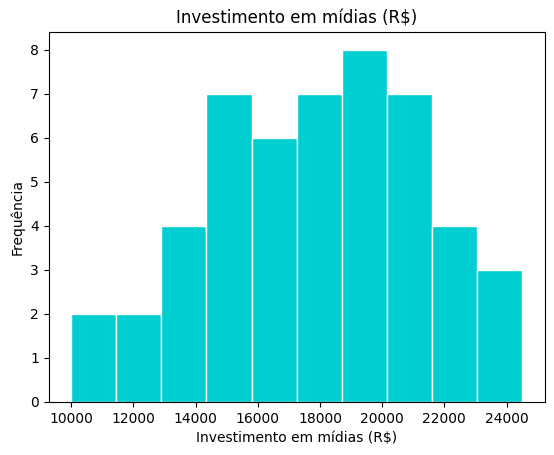

In [11]:
# Histograma do investimento em mídias
plt.hist(dados_faturamento['INVESTIMENTO'], color='darkturquoise', edgecolor='white',bins=10)
plt.xlabel('Investimento em mídias (R$)')
plt.ylabel('Frequência')
plt.title('Investimento em mídias (R$)')
plt.show() 

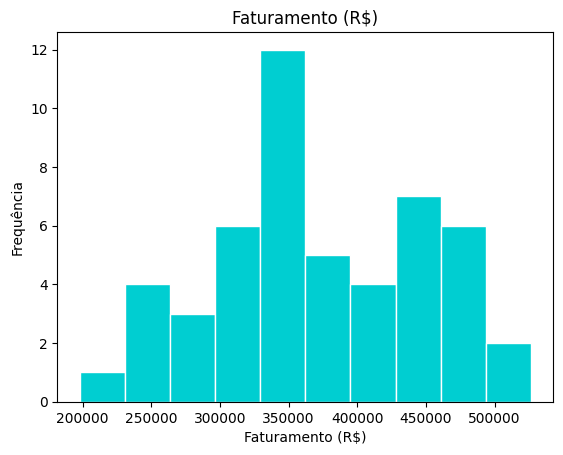

In [12]:
# Histograma do faturamento
plt.hist(dados_faturamento['FATURAMENTO'], color='darkturquoise', edgecolor='white',bins=10)
plt.xlabel('Faturamento (R$)')
plt.ylabel('Frequência')
plt.title('Faturamento (R$)')
plt.show() 

### Análise bivariada: variável resposta vs. variáveis explicativas

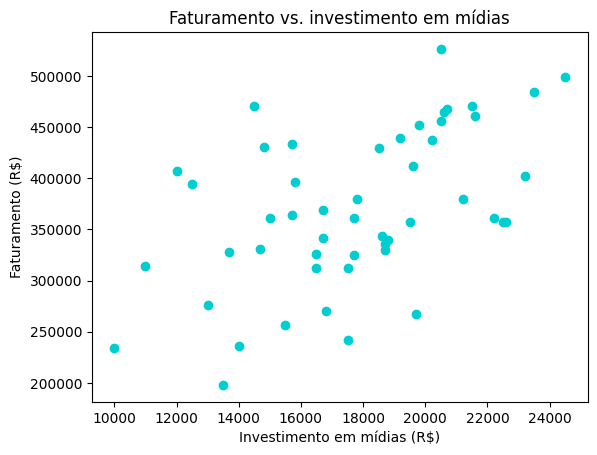

In [13]:
# Gráfico de dispersão
plt.scatter(dados_faturamento['INVESTIMENTO'],dados_faturamento['FATURAMENTO'], color='darkturquoise')
plt.xlabel('Investimento em mídias (R$)')
plt.ylabel('Faturamento (R$)')
plt.title("Faturamento vs. investimento em mídias")
plt.show() 

In [20]:
# Coeficiente de correlação
dados_faturamento[["INVESTIMENTO","FATURAMENTO"]].corr()


,INVESTIMENTO,FATURAMENTO
INVESTIMENTO,1.000000,0.521644
FATURAMENTO,0.521644,1.000000


### Modelo de regressão linear simples

In [62]:
# Ajuste do modelo
modelo = sm.OLS(dados_faturamento['FATURAMENTO'], 
                sm.add_constant(dados_faturamento['INVESTIMENTO']))
resultado = modelo.fit()

In [63]:
#PValues 
#Col [0.025 é o Limite Inferior (intervalor confiança)
#Col 0.975] é o Limite Superior (intervalor confiança)

summary_table = resultado.summary2().tables[1]
summary_table['P>|t|'] = summary_table['P>|t|'].apply(lambda x: '{:.10f}'.format(x))
summary_table

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,161198.005702,50190.999344,3.211691,0.0023571026,60282.237900,262113.773503
INVESTIMENTO,11.745164,2.772660,4.236063,0.0001024271,6.170357,17.319971


In [64]:
resultado.summary2().tables[0]

,0,1,2,3
0,Model:,OLS,Adj. R-squared:,0.257
1,Dependent Variable:,FATURAMENTO,AIC:,1253.9598
2,Date:,2024-07-29 03:07,BIC:,1257.7839
3,No. Observations:,50,Log-Likelihood:,-624.98
4,Df Model:,1,F-statistic:,17.94
5,Df Residuals:,48,Prob (F-statistic):,0.000102
6,R-squared:,0.272,Scale:,4.3880e+09


In [65]:
resultado.summary2().tables[2]

,0,1,2,3
0,Omnibus:,1.470,Durbin-Watson:,1.792
1,Prob(Omnibus):,0.480,Jarque-Bera (JB):,1.076
2,Skew:,0.023,Prob(JB):,0.584
3,Kurtosis:,2.283,Condition No.:,96985


### Gráfico de dispersão com reta ajustada

/tmp/ipykernel_2958/3850616674.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_vals = resultado.params[0] + resultado.params[1] * x_vals


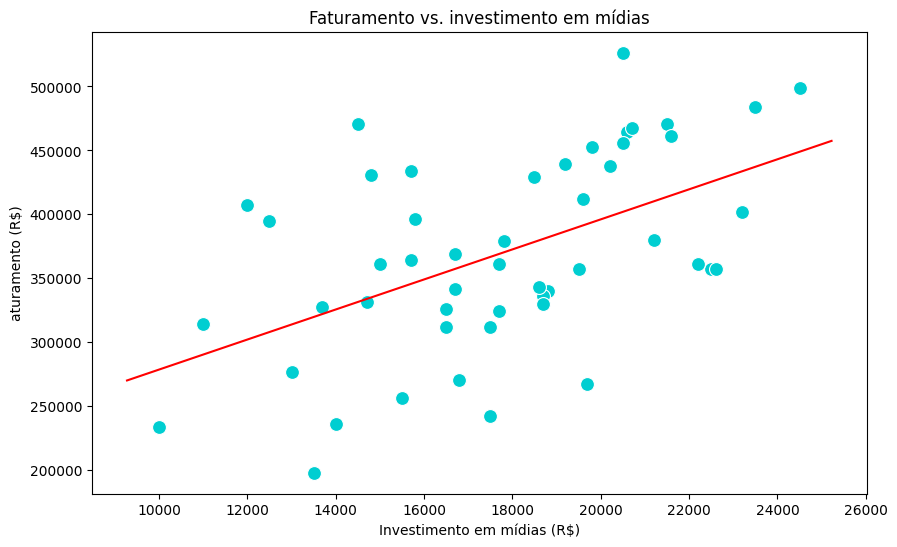

In [66]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='INVESTIMENTO', y='FATURAMENTO', data=dados_faturamento, color='darkturquoise', s=100)
plt.xlabel('Investimento em mídias (R$)')
plt.ylabel('aturamento (R$)')
plt.title('Faturamento vs. investimento em mídias')

# Adicionando a linha de regressão
x_vals = np.array(plt.gca().get_xlim())
y_vals = resultado.params[0] + resultado.params[1] * x_vals
plt.plot(x_vals, y_vals, color='red')

plt.show()

### Qualidade de ajuste

In [67]:
# Acessando valores resultantes do modelo
r_squared = resultado.rsquared
r_squared_adj = resultado.rsquared_adj
coeficientes = resultado.params
p_values = resultado.pvalues
std_err = resultado.bse
valores_preditos = resultado.fittedvalues
residuos = resultado.resid

# Exibindo os valores
# print(f'R ao quadrado: {r_squared}')
# print(f'R ao quadrado ajustado: {r_squared_adj}')
# print(f'Coeficientes: \n{coeficientes}')
# print(f'p-valores: \n{p_values}')
# print(f'Erros padrão: \n{std_err}')
# print(f'Valores preditos: \n{valores_preditos}')
# print(f'Resíduos: \n{residuos}')


In [68]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [42]:
# Coeficiente de determinação (R²)
print(resultado.rsquared)

0.27211223731059464


In [44]:
# MAE
print(mean_absolute_error(dados_faturamento['FATURAMENTO'], resultado.fittedvalues))

55299.25147865965


In [45]:
# MAPE
print(mean_absolute_percentage_error(dados_faturamento['FATURAMENTO'], resultado.fittedvalues))

0.16080091231981242


### Análise de resíduos

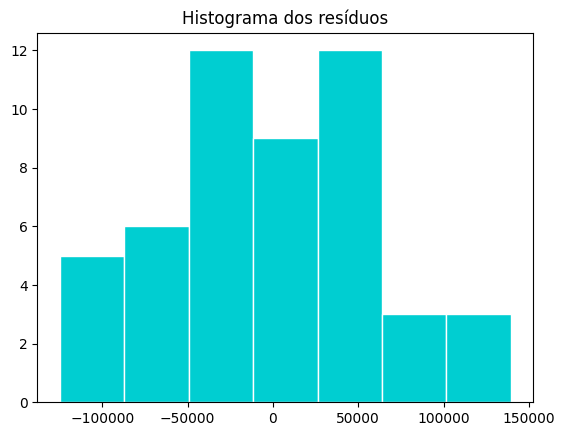

In [50]:
# Histograma dos resíduos
plt.hist(resultado.resid, color='darkturquoise', edgecolor='white',bins=7)
plt.title('Histograma dos resíduos')
plt.show() 

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/gofplots.py:1043: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


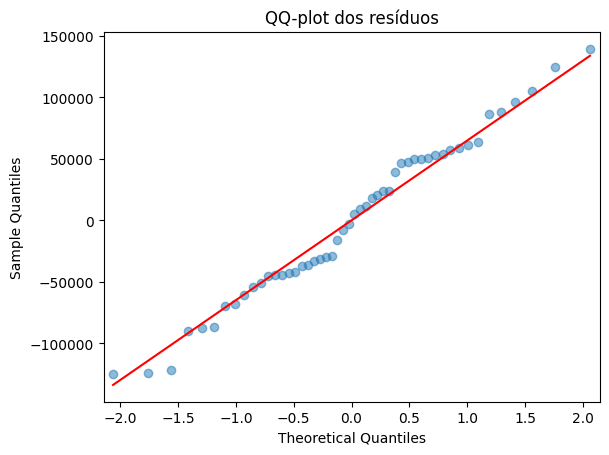

In [51]:
# QQ plot dos resíduos
sm.qqplot(resultado.resid, line='s', color='darkturquoise', marker='o', alpha=0.5)
plt.title("QQ-plot dos resíduos")
plt.show()

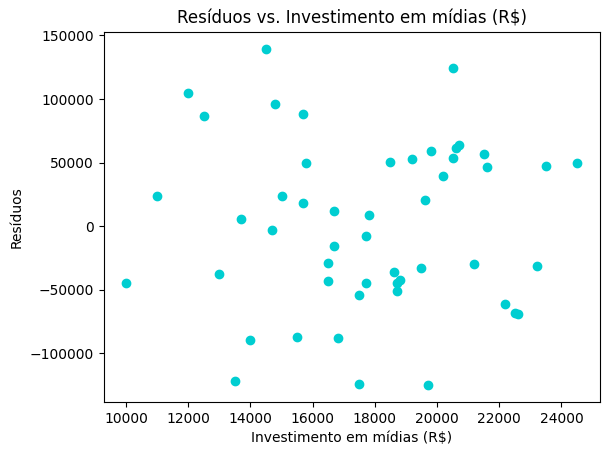

In [52]:
# Resíduos vs. tempo de experiência
plt.scatter(dados_faturamento['INVESTIMENTO'],resultado.resid, color='darkturquoise')
plt.xlabel('Investimento em mídias (R$)')
plt.ylabel('Resíduos')
plt.title("Resíduos vs. Investimento em mídias (R$)")
plt.show() 

### Exemplo de uso (aplicação) do modelo

In [74]:
# Criação de base de dados com um novo vendedor, com 12 anos de experiência
# Obs.: o nome de coluna deve ser idêntico ao da base utilizada para construção do modelo ("Tempo_Experiencia") --- no Python n precisa, porém temos q adicinoar o "constant"
novos_dados = pd.DataFrame({"INVESTIMENTO":[18000,69550,75254]})
novos_dados = sm.add_constant(novos_dados)
novos_dados


,const,INVESTIMENTO
0,1.0,18000
1,1.0,69550
2,1.0,75254


In [75]:
# Aplicação do modelo
novos_dados["INVESTIMENTO_PREDITO"] = resultado.predict(novos_dados).round()
novos_dados

,const,INVESTIMENTO,INVESTIMENTO_PREDITO
0,1.0,18000,372611.0
1,1.0,69550,978074.0
2,1.0,75254,1045069.0
